### DB SCAN

Algorytm DBScan należy do klasy algorytmów opartych o gęstości danych. Pozawal nie tylko grupować dane, ale również wydobywać z tych danych outliery (elementy odstające, szum).

W metodzie wyróżniamy trzy rodzaje punktów:
- core point
- border point
- outlier point

Poruszamy się w zakresie sąsiedztwa (zdefiniowanego parametrem eps). Wyczerpanie sąsiedztwa oznacza przejście do kolejnego klastra. Jeżeli pierwszy punkt ma mniej sąsiadów niż wartość parametru min_sample, to jest outlierem. W przeciwnym razie budujemy klaster. W odróżnieniu od innych algorytmów w algorytmie DBSCAN nie podajemy oczekiwanej liczby klastrów. Algorytm sam wyznacza liczbę klastrów na podstawie wartości parametrów eps i max_sample.

#### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

#### Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=3, cluster_std=1.2, center_box=(-8.0, 8.0), random_state=42)[0]

#### Wizualizacja

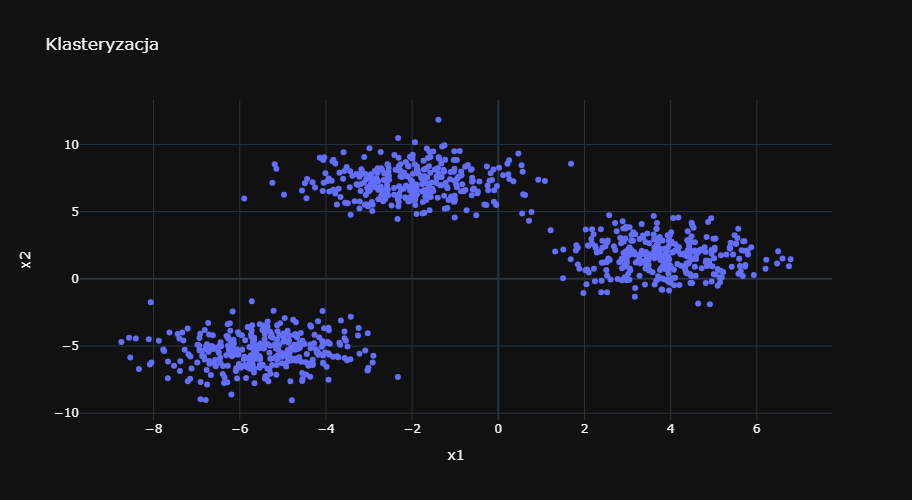

In [3]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', width=950, height=500, title='Klasteryzacja', template='plotly_dark')

#### Model

In [4]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.5, min_samples=5)
cluster.fit(data)  # trenujemy

DBSCAN()

In [5]:
cluster.labels_[:10]  # obliczone numery klastrów dla poszczególnych punktów

array([0, 0, 1, 2, 2, 0, 1, 1, 1, 1], dtype=int64)

#### Wizualizacja grupowania

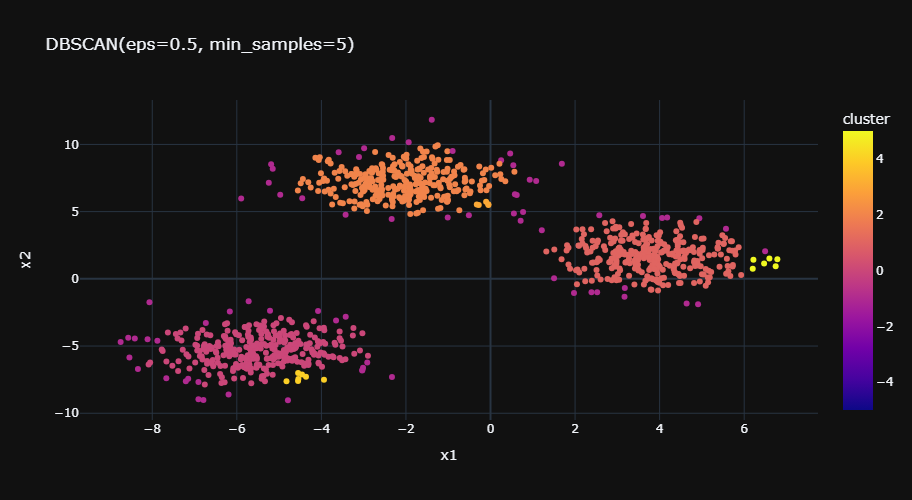

In [6]:
df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=5)', 
           template='plotly_dark', color_continuous_midpoint=0)

# W wyniku widzimy trzy duże klastry, trzy mniejsze i sporo outlierów (klaster -1)

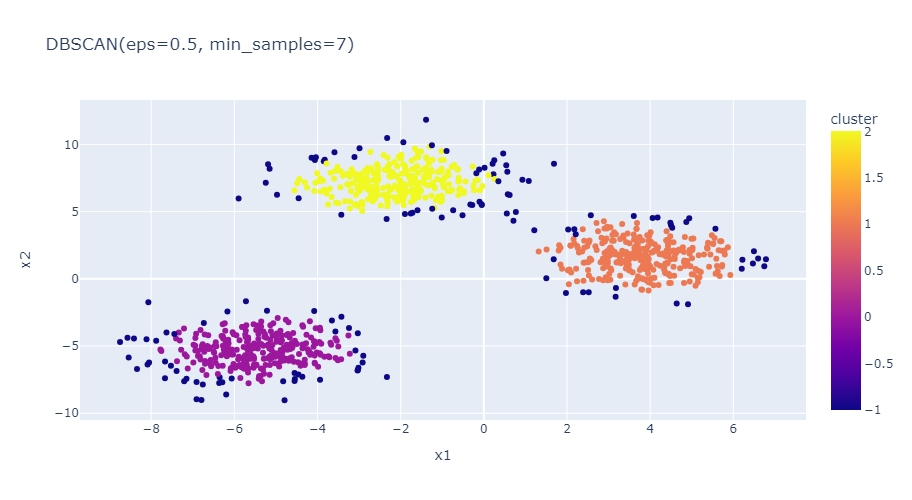

In [7]:
# modyfikujemy parametry: promień sąsiedztwa (eps) oraz minimlna liczba próbek (min_samples)
cluster = DBSCAN(eps=0.5, min_samples=7)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=7)')

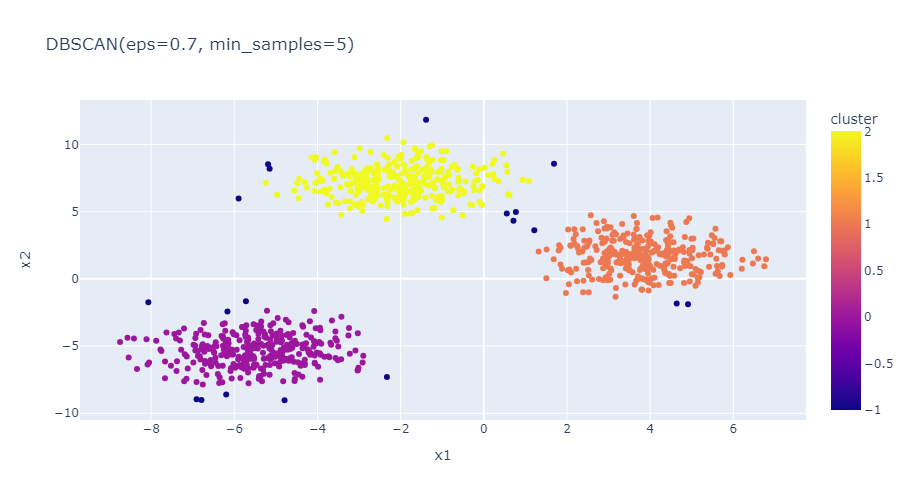

In [8]:
cluster = DBSCAN(eps=0.8, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.7, min_samples=5)')

#### Popatrzmy dla 4 klastrów

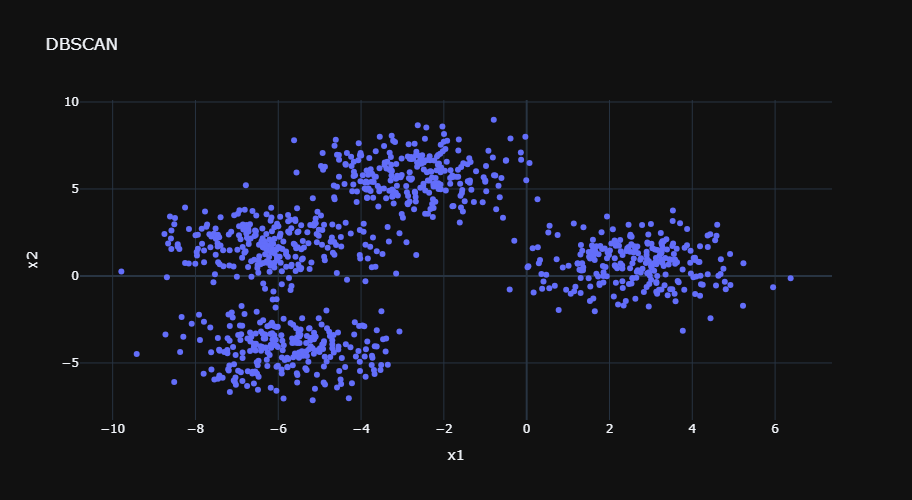

In [9]:
# generujemy nowe dane
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.2, center_box=(-8.0, 8.0), random_state=43)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', width=950, height=500, title='DBSCAN', template='plotly_dark')

# dane nie są w łatwy sposób sepraowalne

[-1  0  1  2  3  4  5  6  7  8]


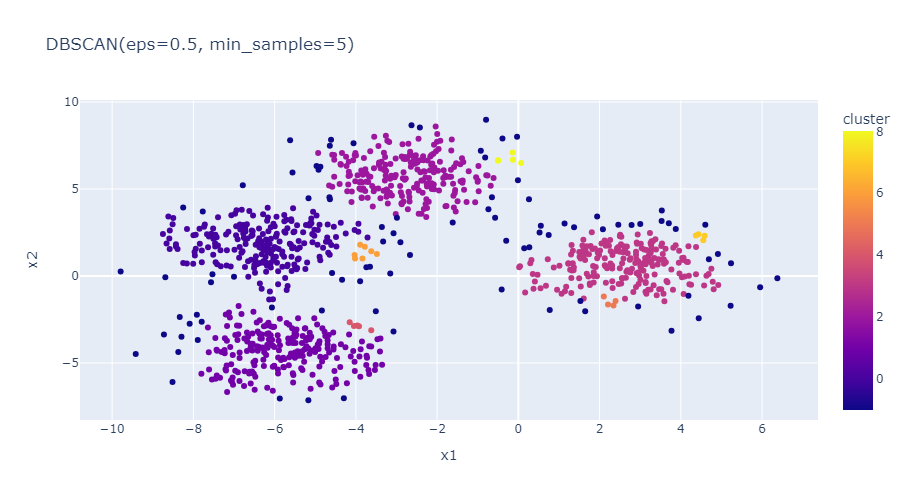

In [10]:
cluster = DBSCAN(eps=0.5, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
print(np.unique(cluster.labels_))  # sporo (9) klastrów nie licząc outlierow

px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=5)')

Popatrzmy na liczbę punktów w poszczególnych klastrach

In [11]:
df.cluster.value_counts()

cluster
 1    228
 0    223
 2    221
 3    210
-1     93
 6      7
 8      5
 4      5
 5      4
 7      4
Name: count, dtype: int64

Zaraz, skoro min_samples ustawilśmy na 5, to dlaczego mamy klastry które mają po 4 punkty (klaster 5 i 7) ?

Punkty graniczne, które są osiągalne z więcej niż jednego klastra, mogą być częścią każdego klastra, w zależności od kolejności przetwarzania danych (czyli decyduje kolejność przetwarzania). Taka sytuacja ma niewielki wpływ na wynik klastrowania.
Innymi słowy punkty graniczne klastrów 5 i 7 zostały zaklasyfikowane do klastra 3 (bo klaster 3 liczony był jako pierwszy), ale widnieją jako klastry, bo liczone były niezależnie od pozostałych klastrów.

Zwiększmy epsilon

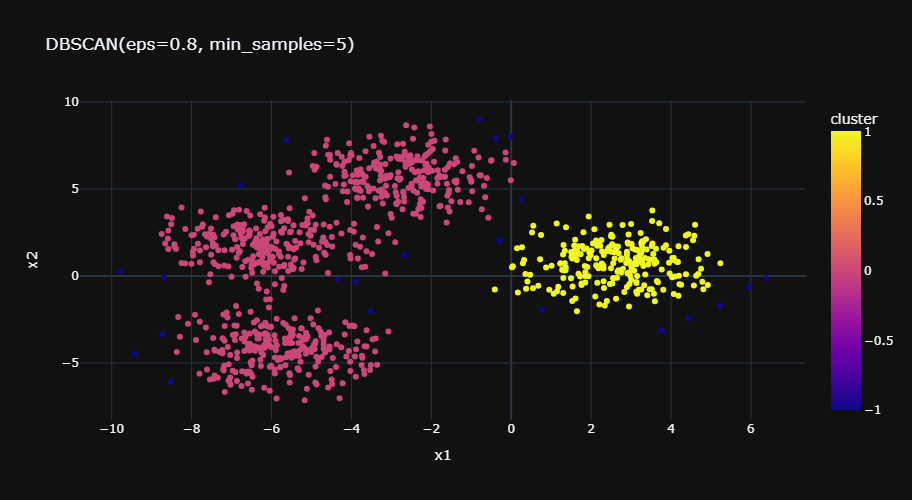

In [12]:
cluster = DBSCAN(eps=0.8, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.8, min_samples=5)', template='plotly_dark')

Dostaliśmy dwa klastry. 

Widać, że parametry mogą mieć ogromny wpływ na wynik końcowy.

Spróbujmy tak dopasować parametry, żeby efekt klasteryzacji był najbliższy naszym oczekiwaniom.

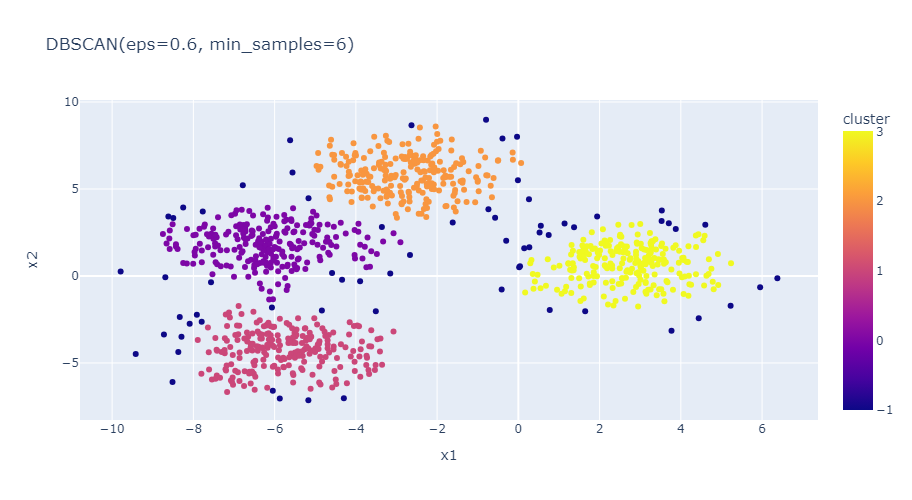

In [13]:
cluster = DBSCAN(eps=0.6, min_samples=6)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.6, min_samples=6)')

Popatrzmy jeszcze na klasę DBSCAN

In [14]:
# parametr metric
DBSCAN?

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
occur when the `eps` param is large and `min_samples` is low.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_s